<img align="right" style="max-width: 200px; height: auto" src="cfds_logo.png">

###  Lab 06 - "Supervised Machine Learning Support Vector Classification"

Chartered Financial Data Scientist (CFDS), Spring Term 2020

In this lab, we will use a classification technique referred to as **Support Vector Machine (SVM)**. Please recall that SVMs correspond to the class of **discriminative** classifiers as distinguished in the following illustration: 

<img align="center" style="max-width: 700px; height: auto" src="supervisedlearning.png">

(Inspired by: 'Machine Learning - A Probabilistic Perspective', Kevin P. Murphy)

The *discriminative* **Support Vector Machine (SVM)** classifier is a supervised machine learning model that learns an optimal separating $n$-dimensional hyperplane to distinguish different observations of training data according to their corresponding class labels. Until recently (before to the advent of deep learning approaches) SVMs have been used in a variety of applications such as isolated handwritten digit recognition[2], object recognition[3], speaker identification[4], face detection in images[5], and text categorisation[6].

This third lab builds in parts on the excellent SVM tutorial **"A Tutorial on Support Vector Machines for Pattern Recognition"** developed by Christopher J.C. Burges. The original tutorial is available under the following URL: https://link.springer.com/article/10.1023/A:1009715923555. 

As always, pls. don't hesitate to ask all your questions either during the lab or send us an email (using our
fds.ai email addresses).

### Lab Objectives:

After today's lab, you should be able to:

> 1. Understand how a **Suppport Vector Machine (SVM)** classifier can be trained and evaluated.
> 2. Understand the impact of selected **SVM hyperparameters** and distinct kernel functions.  
> 3. Design and extract information of **handcrafted features** from a set of arbitrary images. 
> 3. Train and evaluate discriminative **machine learning models** using Python's `scikit-learn` library.
> 4. Understand how to **evaluate** and **interpret** the classification results.

Before we start, let's watch a motivational video:

In [1]:
from IPython.display import YouTubeVideo
# OpenAI: "Solving Rubik's Cube with a Robot Hand"
# YouTubeVideo('x4O8pojMF0w', width=800, height=600)

### Setup of the Analysis Environment

Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualisation. In this lab will use the `Pandas`, `Numpy`, `Scikit-Learn`, `Matplotlib` and the `Seaborn` library. Let's import the libraries by the execution of the statements below:

In [2]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import torchvision library
import torchvision

# import sklearn HOG feature library
from skimage.feature import hog

# import sklearn support vector classifier (svc) library
from sklearn.svm import SVC

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Enable inline Jupyter notebook plotting:

In [3]:
%matplotlib inline

Ignore potential library warnings:

In [4]:
import warnings
warnings.filterwarnings('ignore')

Use the 'Seaborn' plotting style in all subsequent visualisations:

In [5]:
plt.style.use('seaborn')

Set random seed of all our experiments:

In [6]:
random_seed = 42

## 1. Support Vector Machine (SVM) Classification

### 1.1. Dataset Download and Data Assessment

The **Iris Dataset** is a classic and straightforward dataset often used as a "Hello World" example in multi-class classification. This data set consists of measurements taken from three different types of iris flowers (referred to as **Classes**),  namely the Iris Setosa, the Iris Versicolour, and, the Iris Virginica) and their respective measured petal and sepal length (referred to as **Features**).

<img align="center" style="max-width: 700px; height: auto" src="iris_dataset.png">

(Source: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

In total, the dataset consists of **150 samples** (50 samples taken per class) as well as their corresponding **4 different measurements** taken for each sample. Please, find below the list of the individual measurements:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Further details of the dataset can be obtained from the following publication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Let's load the dataset and conduct a preliminary data assessment: 

In [7]:
iris = datasets.load_iris()

Print and inspect the names of the four features contained in the dataset:

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Determine and print the feature dimensionality of the dataset:

In [9]:
iris.data.shape

(150, 4)

Determine and print the class label dimensionality of the dataset:

In [10]:
iris.target.shape

(150,)

Print and inspect the names of the three classes contained in the dataset:

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's briefly envision how the feature information of the dataset is collected and presented in the data:

<img align="center" style="max-width: 900px; height: auto" src="featurecollection.png">

Let's inspect the top five feature rows of the Iris Dataset:

In [12]:
pd.DataFrame(iris.data, columns=iris.feature_names).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Let's also inspect the top five class labels of the Iris Dataset:

In [13]:
pd.DataFrame(iris.target, columns=["class"]).head(10)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Let's now conduct a more in-depth data assessment. Therefore, we plot the feature distributions of the Iris dataset according to their respective class memberships as well as the features pairwise relationships.

Pls. note that we use Python's **Seaborn** library to create such a plot referred to as **Pairplot**. The Seaborn library is a powerful data visualisation library based on the Matplotlib. It provides a great interface for drawing informative statistical graphics (https://seaborn.pydata.org). 

<Figure size 720x720 with 0 Axes>

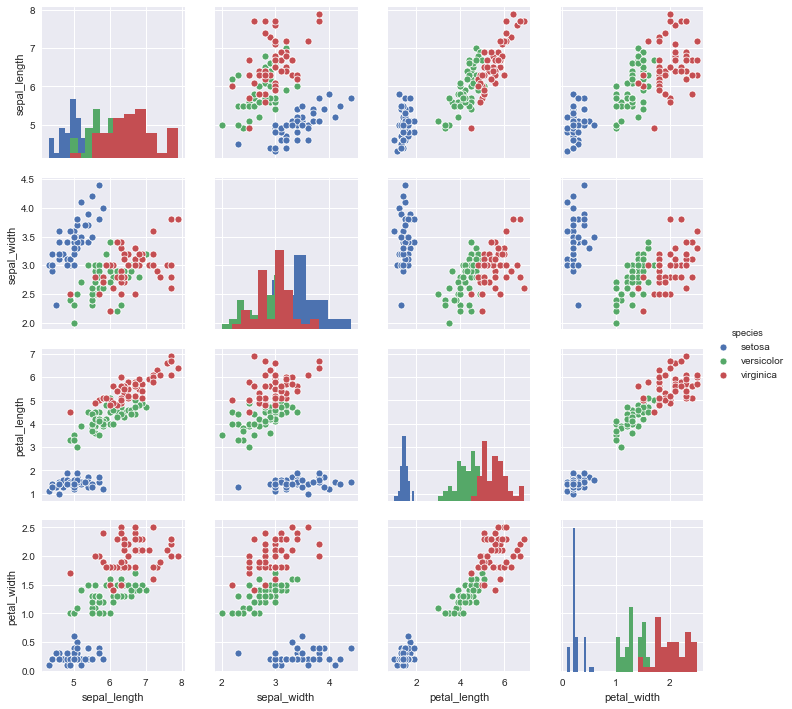

In [14]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

It can be observed from the created Pairplot, that most of the feature measurements that correspond to flower class "setosa" exhibit a nice **linear separability** from the feature measurements of the remaining flower classes. Besides, the flower classes "versicolor" and "virginica" exhibit a commingled and **non-linear separability** across all the measured feature distributions of the Iris Dataset.

### 1.2. Dataset Pre-Processing and Train-/Test-Split

To understand and evaluate the performance of any trained **supervised machine learning** model, it is good practice, to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and an **evaluation set** (the fraction of data records solely used for evaluation purposes). Pls. note, the **evaluation set** will never be shown to the model as part of the training process.

<img align="center" style="max-width: 500px; height: auto" src="trainevaldataset.png">

We set the fraction of evaluation records to **30%** of the original dataset:

In [15]:
eval_fraction = 0.3

Randomly split the dataset into a training set and an evaluation set using sklearns `train_test_split` function:

In [16]:
# 70% training and 30% evaluation
x_train, x_eval, y_train, y_eval = train_test_split(iris.data, iris.target, test_size=eval_fraction, random_state=random_seed, stratify=None)

Evaluate the dimensionality of the training dataset $x^{train}$:

In [17]:
x_train.shape, y_train.shape

((105, 4), (105,))

Evaluate the dimensionality of the evaluation dataset $x^{eval}$:

In [18]:
x_eval.shape, y_eval.shape

((45, 4), (45,))

### 1.3. Support Vector Machine (SVM) Classification

Let's suppose we are given $l$ observations. Each observation consists of a pair: a vector $x_{i} \in \mathbb{R}^{n}, i=1, ..., l$ and the associated "truth" $y_{i}$, provided by a trusted source. In the context of a face detection task, $x_{i}$ might be vector of pixel values (e.g. $n$=256 for 1024x1024 pixel image), and $y_{i}$ would be $1$ if the image contains a face, and $-1$ otherwise. 

#### 1.3.2. Linear Support Vector Machine (SVM) Classifiers - The Linear Separable Case

Suppose we have some hyperplane which separates the positive from the negative examples referred to as "separating hyperplane". The points $x$ which lie on the hyperplane satisfy the following equation $w \cdot x + b = 0$, where $w$ is normal to the hyperplane, $|b|/||w||$ is the perpendicular distance from the hyperplane to the origin, and $||w||$ is the Euclidean norm of $w$. Let $d_{+}$ ($d_{-}$) be the shortest distance from the separating hyperplane to the closest positive (negative) example. We define the "margin" of a separating hyperplane to be $d_{+} + d_{-}$. In the context of the linearly separable case, the support vector algorithm simply looks for the separating hyperplane with the maximum margin. 

<img align="center" style="max-width: 400px; height: auto" src="hyperplanelinear.png">

Linear separating hyperplanes $H_{1}$, $H_{2}$, and $H^{*}$ for the separable case. The support vectors that constitute $H_{1}$, $H_{2}$ are circled.

(Source: https://link.springer.com/article/10.1023/A:1009715923555)

Suppose that all the training data satisfies the following constraints: 

$$ x_{i} \cdot w + b \geq + 1, y_{i} = +1 $$

$$ x_{i} \cdot w + b \leq - 1, y_{i} = -1 $$

This can be combined into one set of inequalities: 

$$y_{i}(x_{i} \cdot w + b) - 1 \geq 0, \forall_{i}$$

Let's now consider the points for which the equality $x_{i} \cdot w + b \geq + 1$ holds. These points lie on a hyperplane $H_{1}: x_{i} \cdot w + b = + 1$ with normal $w$ and perpendicular distance from the origin $|1-b|/||w||$. Similarly, the points for which the equality $x_{i} \cdot w + b \leq - 1$ holds lie on the hyperplane $H_{2}: x_{i} \cdot w + b = -1$, with normal again $w$, and perpendicular distance from the origin $|-1-b|/||w||$. Hence $d_{+} = d_{-} = 1 / ||w||$ and the margin is simply 2/||w||. Note that $H_{1}$ and $H_{2}$ are parallel and that no training points $x_{i}$ fall between them. Thus we can find a pair of hyperplanes which correspond to a maximum margin by minimizing $||w||^{2}$, subject to constraint $y_{i}(x_{i} \cdot w + b) - 1 \geq 0$. Those training points $x_{i}$ which wind up lying on one of the hyperplanes $H_{1}$, $H_{2}$, and whose removal would change the solution found, are referred to as **"support vectors"**.

#### A "Primal"  Optimization Objective Formulation

As discussed in the lecture, we can reformulate the objective of finding such a max-margin seperating hyperplane as a Lagrangian optimization objective. Thereby, we introduce a set of positive Lagrange multipliers $\alpha_{i}, i=1, ..., l$ which turns the search for a max-margin seperating hyperplane into solving the following Lagrangian:

$$L_{P} = \frac{1}{2}||w||^{2} - \sum_{i=1}^{l} \alpha_{i}y_{i}(x_{i} \cdot w + b) + \sum_{i=1}^{l}\alpha_{i}$$

We must now minimize $L_{P}$, referred to as the **"primal"**, with respect to $w$, $b$. Thereby, 

> 1. the minimization of the first term $\frac{1}{2}||w||^{2}$ maximizes the margin of the separating hyperplane, 
> 2. the maximization of the second term $\sum_{i=1}^{l} \alpha_{i}y_{i}(x_{i} \cdot w + b)$ maximizes the number of correctly classfied training samples,
> 3. the minimization of the third term $\sum_{i=1}^{l}\alpha_{i}$ minimizes the number of support vectors. 

Minimization of $L_{P}$ is a convex quadratic programming problem, since the objective function is itself convex, and those points for which $\alpha_{i} > 0$ that satisfy the constraints also form a convex set. Again, those points are called "support vectors", and lie on one of the hyperplanes $H_{1}$, $H_{2}$.

#### A "Dual" Optimization Objective Formulation

Requiring that the gradient of $L_{P}$ with respect to $w$ and $b$ vanish result in the conditions, that $w = \sum_{i=1}^{l} \alpha_{i}y_{i}x_{i}$ and $\sum_{i=1}^{l}\alpha_{i}y_{i} = 0$. Using those conditions, the above shown Lagrangian can be reformulated to derive its **"dual"** formulation:

$$L_{D} = \sum_{i=1}^{l}\alpha_{i} + \frac{1}{2} \sum_{i,j=1}^{l} \alpha_{i}\alpha_{j}y_{i}y_{j}<x_{i}, x_{j}>$$

Note that solving the dual formulation doesn't depend on $w$ anymore. It only depends on the samples $x_{i} \in \mathbb{R}^{n}, i=1, ..., l$ of the training dataset as well as the associated labels $y_{i}$. This indicates that the optimal seperating hyperplane $H^{*}$ becomes a linear function of the data. Note also that if we formulate the problem, as above, with $b=0$, requires that all hyperplanes contain the origin. However, this is a mild restriction for high dimensional spaces since it amounts to reducing the number of degrees of freedom by one.

#### 1.3.3. Training of a Linear Support Vector Machine (SVM) Classifer using Python's Scikit-Learn Library

Luckily, the `Scikit-Learn` (https://scikit-learn.org) machine learning library provides a variety of machine learning algorithms that can be easily interfaced using the Python programming language. Among others the library also contains a variety of supervised classification algorithms such as the **Support Vector Machine (SVM)** classifier. The SVM classifier can be trained "off-the-shelf" to solve the dual Lagrangian $L_{D}$ optimization objective formulated above. Let's instantiate one of the SVM classifiers available in `Scikit-Learn` to learn a linear seperating hyperplane:

In [19]:
# init the Support Vector Machine classifier
svm = SVC(kernel='linear', random_state=random_seed)

Train or fit the SVM classifier using the training dataset features and labels:

In [20]:
# train / fit the Support Vector Machine classifier
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

#### 1.3.4. Evaluation of the trained Support Vector Machine Classifier

After fitting the training data, the optimal seperating hyperplane $H^{*}$ learned by the SVM model can then be used to predict the corresponding class labels $y_{i}'$ of so far unknown observations $x_{i}'$. We will utilize the trained model to predict the class labels of the remaining observations contained in the evaluation dataset:

In [21]:
y_pred = svm.predict(x_eval)

Let's have a look at the class labels $y_{i}'$ **predicted** by the SVM classifier on the evaluation dataset:

In [22]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

As well as the **true** class labels $y_{i}$ as contained in the evaluation dataset:

In [23]:
y_eval

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Ok, comparing the **true** and **predicted** class labels looks encouraging. Let's determine the exact **prediction accuracy** that the trained model $h$ was able to achieve on the evaluation dataset:

In [24]:
print('Model classification accuracy: {}%'.format(str(metrics.accuracy_score(y_eval, y_pred) * 100)))

Model classification accuracy: 100.0%


Determine the number of **misclassified** data sampels in the evaluation dataset:

In [25]:
print('Number of mislabeled points out of a total {} points: {}'.format(x_eval.shape[0], np.sum(y_eval != y_pred)))

Number of mislabeled points out of a total 45 points: 0


In the field of machine learning and in particular the field of statistical classification, a **confusion matrix**, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the number of instances that the classifier predicted per class, while each column represents the instances of the true or actual class:

<img align="center" style="max-width: 300px; height: auto" src="confusionmatrix.png">

(Source: https://en.wikipedia.org/wiki/Confusion_matrix)

Determine and plot the **confusion matrix** of the individual predictions:

In [26]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Plot the **confusion matrix** of the individual predictions:

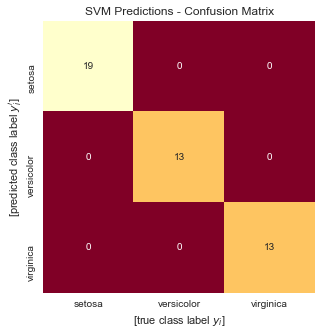

In [27]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=iris.target_names, yticklabels=iris.target_names)

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')

# add plot title
plt.title('SVM Predictions - Confusion Matrix');

#### 1.3.5. Prediction of Classes of Unknown Iris Flower Observations

**First unknown iris flower:** Now that we have trained and evaluated our SVM classifier let's apply it to two so far unknown or unseen **iris flower** observations. The first **iris flower** observation $x^{s1}$ exhibits the following observed feature values: $x^{s1} = \{x_{sl}=5.8, x_{sw}=3.5, x_{pl}=1.5, x_{pw}=0.25\}$:

<img align="center" style="max-width: 200px; height: auto" src="iris_sample_1.png">

(Source: https://de.wikipedia.org/wiki/Schwertlilien)

Let's convert those measurements into a feature vector $x^{s1}$:

In [28]:
# init features of the first unknown iris flower observation 
sepal_length = 5.8 
sepal_width  = 3.5
petal_length = 1.5
petal_width  = 0.25

# create the observation feature vector
x_s1_feature_vector = [sepal_length, sepal_width, petal_length, petal_width]

# print the feature vector
print(x_s1_feature_vector)

[5.8, 3.5, 1.5, 0.25]


Let's now use our trained SVM model $h$ to predict the class $c^{*}$ of the unknown iris flower $x^{s1}$:

In [29]:
# determine class label prediction of the first unknown observation
class_prediction_sample_1 = svm.predict([x_s1_feature_vector])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_1[0]])

setosa


Let's build an intuition of the distinct iris flower class distributions including the current iris flower observation:

<Figure size 720x720 with 0 Axes>

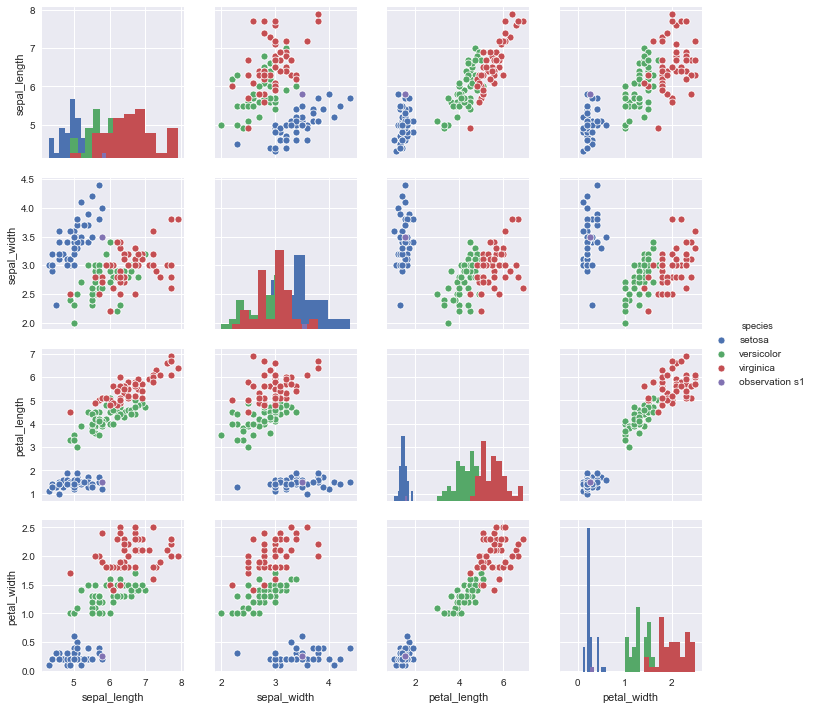

In [30]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset('iris')

# add preliminary label to unknown feature observation
x_s1_feature_vector.append('observation s1')

# add observation to the iris dataset
iris_plot = iris_plot.append(pd.DataFrame([x_s1_feature_vector], columns=iris_plot.columns))

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Ok, the feature distributions of the feature values observable for the unknown iris flower $x^{s1}$ exhibit a high likelihood of beeing of class **setosa**.

**Second unknown iris flower:** Let's apply the learned SVM model to a second unknown or unseen **iris flower** observations. The second **iris flower** observation $x^{s2}$ exhibits the following observed feature values $x^{s2} = \{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$:

<img align="center" style="max-width: 200px; height: auto" src="iris_sample_2.png">


(Source: https://de.wikipedia.org/wiki/Schwertlilien)

Let's again convert those measurements into a feature vector $x^{s2}$:

In [31]:
# init features of the second unknown iris flower observation 
sepal_length = 7.8
sepal_width  = 2.3
petal_length = 6.4
petal_width  = 2.5

# create the observation feature vector
x_s2_feature_vector = [sepal_length, sepal_width, petal_length, petal_width]

# print the feature vector
print(x_s2_feature_vector)

[7.8, 2.3, 6.4, 2.5]


Use the trained SVM model $h$ to predict the class $c^{*}$ of the unknown iris flower $x^{s2}$:

In [32]:
# determine class label prediction of the first unknown observation
class_prediction_sample_2 = svm.predict([x_s2_feature_vector])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_2[0]])

virginica


Ok, does this looks like a reasonable prediction? Let's again try to build an intuition of the prediction derived from the SVM model $h$ based on the distinct iris flower class distributions including $x^{s2}$: 

<Figure size 720x720 with 0 Axes>

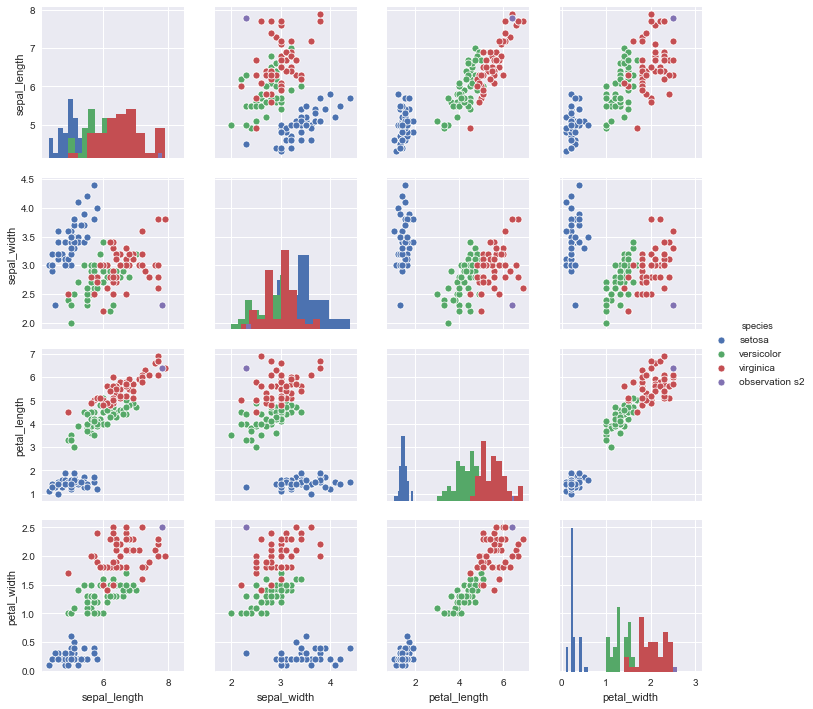

In [33]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# add observations to the iris dataset
iris_plot = iris_plot.append(pd.DataFrame([[7.8, 2.3, 6.4, 2.50, "observation s2"]], columns=iris_plot.columns))

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Ok, the feature distributions of the feature values observable for the unknown iris flower $x^{s1}$ exhibit a high likelihood of beeing of class **virginica**.

#### 1.3.6. Linear Support Vector Machine (SVM) Classifers - The Non-Linear Seperable Case

Ok, great we have seen how to apply Support Vector classification to separable data. So how can we extend these ideas to handle non-separable data? To achieve this we would like to relax the initial constraints $ x_{i} \cdot w + b \geq + 1, y_{i} = +1 $ and $ x_{i} \cdot w + b \leq - 1, y_{i} = -1 $ when necessary. That is, we would like to introduce a further cost for doing so. This can be done by the introducing of so-called positive **"slack variables"** denoted $\xi_{i}, i=1, ..., l$ in the Lagrange optimization $L_{P}$.

<img align="center" style="max-width: 400px; height: auto" src="hyperplaneslack.png">

Linear separating hyperplanes $H_{1}$, $H_{2}$, and $H^{*}$ for the non-separable case. The support vectors that constitute $H_{1}$, $H_{2}$ are circled.

(Source: https://link.springer.com/article/10.1023/A:1009715923555)

Therefore, the initial constraints become:

$$ x_{i} \cdot w + b \geq + 1 - \xi_{i}, y_{i} = +1 $$

$$ x_{i} \cdot w + b \leq - 1 + \xi_{i}, y_{i} = -1 $$

$$ \xi_{i} \geq 0,  \forall i$$

Thus, for an error to occur, the corresponding $\xi_{i}$ must exceed unity. As a result, $\sum_{i=1}^{l} \xi_{i}$ defines an upper bound on the number of training errors.

#### A "Primal"  Optimization Objective Formulation

A natural way to assign such an extra cost for errors is to add it to the primal Lagrangian objective function $L_{P}$ to be optimized. The Lagrangian therefore becomes:

$$L_{P} = \frac{1}{2}||w||^{2} + C \sum_{i=1}^{l} \xi_{i} - \sum_{i=1}^{l} \alpha_{i}\{y_{i}(x_{i} \cdot w + b) -1 + \xi_{i}\} + \sum_{i=1}^{l}\alpha_{i} - \sum_{i=1}^{l} \mu_{i} \xi_{i} $$

where $C$ is a parameter determines the penalty magnitude of errors. Furthermore, $\mu_{i}$ are another set of Lagrange multipliers introduced to enforce positivity of the slack variables $\xi_{i}$. We must now minimize $L_{P}$ with respect to $w$, $b$. Thereby, 

> 1. the minimization of the first term $\frac{1}{2}||w||^{2}$ maximizes the margin of the separating hyperplane,
> 2. the minimization of the second term $C \sum_{i=1}^{l} \xi_{i}$ minimizes the penalty of misclassfied training samples,
> 3. the maximization of the third term $\sum_{i=1}^{l} \alpha_{i}y_{i}(x_{i} \cdot w + b)$ maximizes the number of correctly classfied training samples,
> 4. the minimization of the fourth term $\sum_{i=1}^{l}\alpha_{i}$ minimizes the number of support vectors, 
> 5. the maximization of the fifth term $\sum_{i=1}^{l} \mu_{i} \xi_{i}$ enforces the positivity of the slack variables.

In general, the penalty term $C$ is a parameter to be chosen by the user. A larger $C$ corresponds to assigning a higher penalty to errors.

#### A "Dual" Optimization Objective Formulation

We can again derive a dual formulation of the optimization objective using the conditions that $w = \sum_{i=1}^{l} \alpha_{i}y_{i}x_{i}$ and $\sum_{i=1}^{l}\alpha_{i}y_{i} = 0$, which becomes: 

$$L_{D} = \sum_{i=1}^{l}\alpha_{i} + \frac{1}{2} \sum_{i,j=1}^{l} \alpha_{i}\alpha_{j}y_{i}y_{j}<x_{i}, x_{j}>$$

subject to $0 \leq \alpha_{i} \leq C$. The only difference in comparison to the optimal hyperplane case is that the $\alpha_{i}$ now have an upper bound of C. Again, the optimal seperating hyperplane $H^{*}$ still remains a linear function of the training data.

#### 1.3.7. Training of a Support Vector Machine (SVM) Classifier Using Different C Parameterizations

Let's inspect different parametrizations of $C$ and their corresponding impact on the determined support vectors and learned optimal separating hyperplane $H^{*}$. We can obtain the learned support vectors from the model using the `support_vectors_` method available `Scikit-Learn`. Let's again fit a linear SVM to the training data observations $x_{i}$ using a penalty of $C=1$:

In [34]:
# init the Support Vector Machine classifier
svm = SVC(kernel='linear', C=1, random_state=random_seed)

We will train the SVM model on the sepal length $x_1$ and petal length $x_3$ features of the iris flower dataset to seperate flowers of the classes $c_{1}=$ versicolor and $c_{2}=$ virginica:

In [35]:
x_train_test = x_train[y_train != 0, :][:, [0,2]]
y_train_test = y_train[y_train != 0]

Let's fit the linear SVM model:

In [36]:
svm.fit(x_train_test, y_train_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

Let's briefly glance over the determined support vectors for which $\alpha_{i} > 0$ and that constitute the learned max-margin separating hyperplane $H^{*}$:

In [37]:
svm.support_vectors_

array([[5.6, 4.5],
       [5.4, 4.5],
       [6.7, 5. ],
       [5.9, 4.8],
       [6. , 5.1],
       [6.3, 4.9],
       [6.1, 4.7],
       [6.5, 4.6],
       [6.1, 4.6],
       [6.6, 4.6],
       [5.5, 4.4],
       [6.9, 4.9],
       [6.3, 5.1],
       [6.3, 4.9],
       [5.7, 5. ],
       [6. , 4.8],
       [5.8, 5.1],
       [6. , 5. ],
       [6.2, 4.8],
       [6.9, 5.4],
       [6.5, 5.2],
       [5.6, 4.9],
       [5.9, 5.1],
       [4.9, 4.5]])

Finally, let's visually inspect the maximum margin separating hyperplane $H^{*}$ that was learned by our SVM. Remember, the learned hyperplane was optimized to seperate the features sepal length $x_1$ and petal length $x_3$ of the iris flower classes $c_{1}=$ versicolor and $c_{2}=$ virginica:

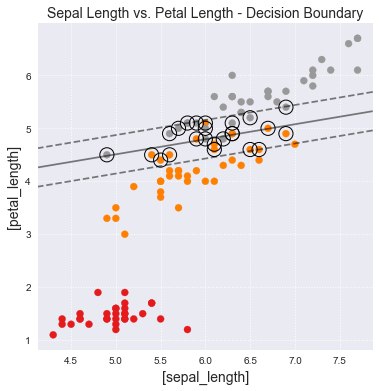

In [38]:
# init the plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# add grid
ax.grid(linestyle='dotted')

# plot sepal length vs. petal length and corresponding classes
ax.scatter(x_train[:,0], x_train[:,2], c=y_train, cmap=plt.cm.Set1)

# highlight the determined support vectors in green
ax.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], s=200, linewidth=1, facecolor='none', edgecolors='k', label='support vectors')

# determine axis ranges
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create meshgrid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# determine and plot decision boundary
Z = svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# add axis legends
ax.set_xlabel("[sepal_length]", fontsize=14)
ax.set_ylabel("[petal_length]", fontsize=14)

# add plot title
plt.title('Sepal Length vs. Petal Length - Decision Boundary', fontsize=14);

Ok, we can observe how the learned 24 support vectors nicely constitute the optimal maximum margin separating hyperplane $H^{*}$. Let's now investigate how different values of $C \in \{0.1, 10, 100, 1000\}$ will penalize and therefore affect the number of support vectors. Remember, a larger value of $C$ corresponds to assigning a higher penalty to errors:

In [39]:
# init distinct C values
C_values = [0.1, 1, 10, 100]

# init SVM models of distinct C values
svm_models = (SVC(kernel='linear', C=C, random_state=random_seed) for C in C_values)

Let's fit the linear SVM models using distinct values of the penalty term $C$:

In [40]:
# fit the distinct SVM models to the data
svm_models = (model.fit(x_train_test, y_train_test) for model in svm_models)

Let's now again visually inspect the maximum margin separating hyperplane $H^{*}$ that was learned by our SVM and applying different values of $C$:

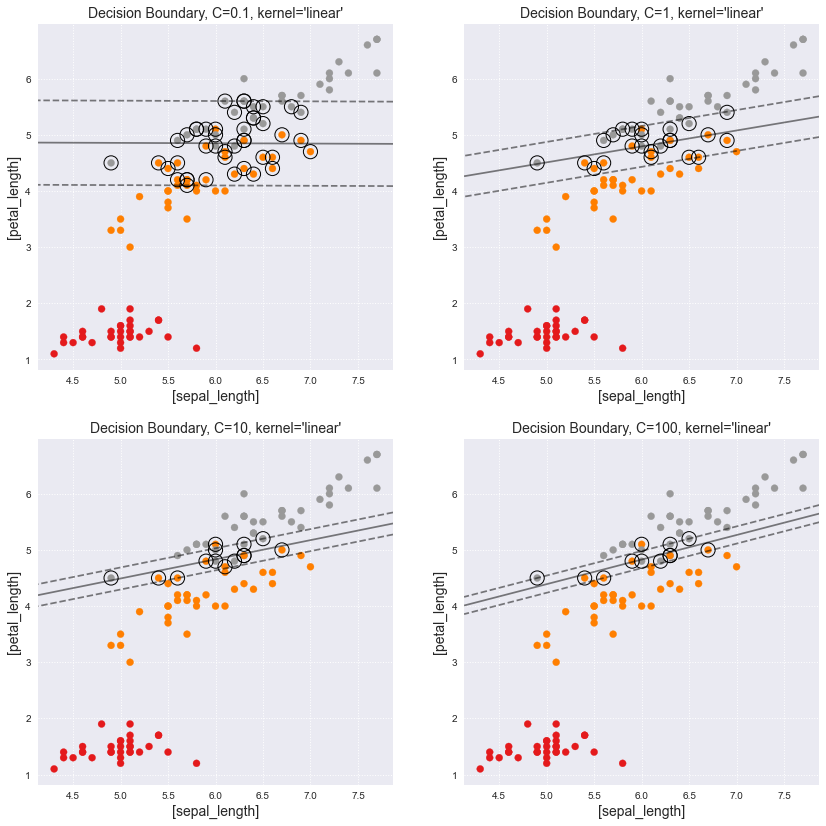

In [41]:
# init the plot
fig, sub = plt.subplots(2, 2, figsize=(14, 14))

# iterate over distinct models
for model, ax in zip(svm_models, sub.flatten()):
    
    # add grid
    ax.grid(linestyle='dotted')

    # plot sepal length vs. petal length and corresponding classes
    ax.scatter(x_train[:,0], x_train[:,2], c=y_train, cmap=plt.cm.Set1)

    # highlight the determined support vectors in green
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=200, linewidth=1, facecolor='none', edgecolors='k', label='support vectors')

    # determine and plot decision boundary
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # add axis legends
    ax.set_xlabel("[sepal_length]", fontsize=14)
    ax.set_ylabel("[petal_length]", fontsize=14)

    # add plot title
    ax.set_title('Decision Boundary, C={}, kernel=\'{}\''.format(str(model.C), str(model.kernel)), fontsize=14);

We can indeed observe that with increasing $C$ the number of misclassifications as well as the number of support vectors that constitute $H^{*}$ decreases. 

#### 1.3.8. Non-Linear Support Vector Machine (SVM) Classifiers

How can the above linear SVMs be generalised to the case where the optimal separating hyperplane $H^{*}$ can not be formulated as a linear function of the data? This holds for instances when the training data is not linearly separable. Boser, Guyon and Vapnik [7] showed the so-called **"kernel trick"** (introduced by Aizermann[8]) could be used to accomplish this in a surprisingly straightforward way. First notice again, from the training objectives dual formulation, that the only way in which the data appears in the objective is in the form of dot products $<x_{i}, x_{j}>$. Now suppose we first mapped the data to some other (possibly infinite-dimensional) Euclidean space $\mathcal{H}$, using the mapping which we will call $\phi$:

$$\phi: \mathcal{R}^{d} \mapsto \mathcal{H}$$

Then, of course, the training algorithm would only depend on the data through dot products in $\mathcal{H}$, i.e. on functions of the form $\phi(x_{i}) \cdot \phi(x_{j})$. Now if there were a **"kernel function"** $K$ such that $K(x_{i}, x_{j}) = \phi(x_{i}) \cdot \phi(x_{j})$, we would only need to use $K$ in the training algorithm, and would never need to explicitly even know what $\phi$ is. One such kernel function is:

$$K(x_{i}, x_{j}) = e^{-||x_{i}-x_{j}||^{2} / 2 \sigma^{2}} $$

In this particular example, $\mathcal{H}$ is infinite-dimensional, so it would not be very easy to work with $\phi$ explicitly. However, if one replaces $x_{i} \cdot x_{j}$ by $K(x_{i}, x_{j})$ everywhere in the training procedure, the algorithm will happily produce a SVM which lives in an infinite-dimensional space. All considerations of the previous sections still hold, since we are still doing a linear separation but in a different space. Since we can again derive a dual formulation of the optimisation objective using the conditions that $w = \sum_{i=1}^{l} \alpha_{i}y_{i}x_{i}$ and $\sum_{i=1}^{l}\alpha_{i}y_{i} = 0$, which becomes:

$$L_{D} = \sum_{i=1}^{l}\alpha_{i} + \frac{1}{2} \sum_{i,j=1}^{l} \alpha_{i}\alpha_{j}y_{i}y_{j}K(x_{i}, x_{j})$$

subject to $0 \leq \alpha_{i} \leq C$. The only difference in comparison to the linear hyperplane case is that the dot product $<x_{i}, x_{j}>$ is now replaced by a kernel function $K(x_{i}, x_{j})$.

#### 1.3.9. Training of a Support Vector Machine (SVM) Classifier Using Different Kernel Functions

Let's now train a set of non-linear SVMs and evaluate different kernel functions $K(x_{i}, x_{j})$. We will again train the distinct SVM models on the sepal length $x_1$ and petal length $x_3$ features of the iris flower dataset to separate the distinct flower classes $c_{0}=$ setosa, $c_{1}=$ versicolor and $c_{2}=$ virginica:

In [42]:
x_train_kernel = x_train[:, [0, 2]]
y_train_kernel = y_train

Next, we will instantiate several SVM models each equipped with a different kernel function. Thereby, we will use three of the kernel functions already available in the `Scikit-Learn` library: 

> 1. linear kernel function: **$<x_{i}, x_{j}>$**,
> 2. radial-basis kernel-function: $exp({- \gamma ||x_{i}, x_{j}||^{2}})$, where $\gamma$ is specified by the keyword `gamma` and must be greater than 0,
> 3. polynomial kernel-function: $(\gamma <x_{i}, x_{j}> + r)^{d}$, where $d$ is specified by the keyword `degree` and $r$ by `coef0`.

Let's instantiate the distinct SVM models accordingly:

In [43]:
# init the SVM models using distinct kernel functions
svm_models = (SVC(kernel='linear', C=1)
              , SVC(kernel='rbf', gamma=0.1, C=1)
              , SVC(kernel='rbf', gamma=0.2, C=1)
              , SVC(kernel='rbf', gamma=0.5, C=1)
              , SVC(kernel='rbf', gamma=0.7, C=1)
              , SVC(kernel='poly', degree=1, coef0=1.0, C=1)
              , SVC(kernel='poly', degree=2, coef0=1.0, C=1)
              , SVC(kernel='poly', degree=5, coef0=1.0, C=1)
              , SVC(kernel='poly', degree=7, coef0=1.0, C=1))

Let's subsequently train the distinct SVM models: 

In [44]:
# fit the distinct SVM models to the data
svm_models = (model.fit(x_train_kernel, y_train_kernel) for model in svm_models)

Let's visually inspect the optimal separating hyperplane $H^{*}$ learned by the distinct kernel functions $K(x_{i}, x_{j})$ to separate the sepal length $x_1$ and petal length $x_3$ features :

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_sh

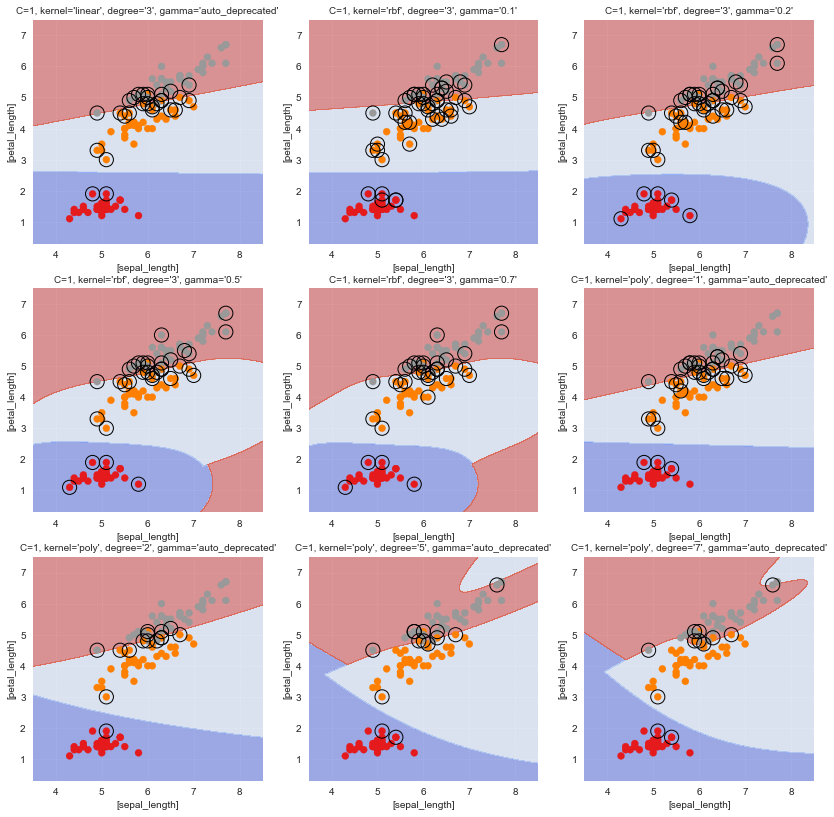

In [45]:
# init the plot
fig, sub = plt.subplots(3, 3, figsize=(14, 14))

# determine mesh-grid limitations
xlim = [np.min(x_train[:, 0]) - 0.8, np.max(x_train[:, 0]) + 0.8]
ylim = [np.min(x_train[:, 2]) - 0.8, np.max(x_train[:, 2]) + 0.8]

# create meshgrid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 1000)
yy = np.linspace(ylim[0], ylim[1], 1000)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# iterate over distinct models
for model, ax in zip(svm_models, sub.flatten()):
    
    print(model)
    
    # add grid
    ax.grid(linestyle='dotted')
    
    Z = model.predict(xy).reshape(XX.shape)
    ax.contourf(XX, YY, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    
    # plot sepal length vs. petal length and corresponding classes
    ax.scatter(x_train[:,0], x_train[:,2], c=y_train, cmap=plt.cm.Set1)

    # highlight the determined support vectors in green
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=200, linewidth=1, facecolor='none', edgecolors='k', label='support vectors')
    
    # set axis ranges
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # add axis legends
    ax.set_xlabel('[sepal_length]', fontsize=10)
    ax.set_ylabel('[petal_length]', fontsize=10)
    
    # add plot title
    ax.set_title('C={}, kernel=\'{}\', degree=\'{}\', gamma=\'{}\''.format(str(model.C), str(model.kernel), str(model.degree), str(model.gamma)), fontsize=10);

## 2. History of Oriented Gradients (HOG) Feature Extraction and Classification

### 2.1. Dataset Download and Data Assessment 

The **MNIST database** (**M**odified **N**ational **I**nstitute of **S**tandards and **T**echnology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is widely used for training and testing in the field of machine learning. Let's have a brief look into a couple of sample images contained in the dataset:

<img align="center" style="max-width: 500px; height: 300px" src="mnist.png">

(Source: https://en.wikipedia.org/wiki/MNIST_database)

Further details on the dataset can be obtained via: *LeCun, Y., 1998. "The MNIST database of handwritten digits", ( http://yann.lecun.com/exdb/mnist/ )."*

The MNIST database contains **60,000 training images** and **10,000 evaluation images**. The size of each image is 28 by 28 pixels. The handwritten digits contained in each fixe-sized image have been size-normalized and centred. The MNIST dataset is a great dataset to start with when learning about machine learning techniques and pattern recognition methods on real-world data. It requires minimal efforts on preprocessing and formatting the distinct images.

#### 2.1.1. Training Dataset Download and Data Assessment 

Let's download, transform and inspect the training images of the dataset. Therefore, let's first define the directory in which we aim to store the training data:

In [46]:
train_path = './data/train_mnist'

Now, let's download the training data accordingly:

In [47]:
# download and transform training images
mnist_train_data = torchvision.datasets.MNIST(root=train_path, train=True, download=True)

Convert the downloaded images to `Numpy` arrays: 

In [48]:
# convert images and labels to numpy array
mnist_train_data_images = mnist_train_data.data.numpy()
mnist_train_data_labels = mnist_train_data.targets.data.numpy()

Verify the number and dimensionality of training images downloaded:

In [49]:
# determine the number of training data images
mnist_train_data_images.shape

(60000, 28, 28)

Verify the number and dimensionality of training labels downloaded:

In [50]:
mnist_train_data_labels.shape

(60000,)

Furthermore, let's visually inspect a randomly sampled training image:

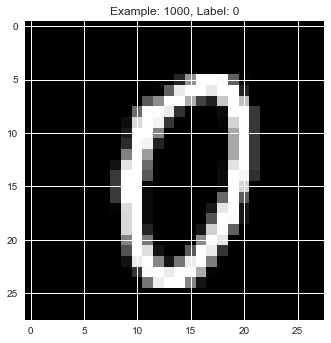

In [51]:
# set image id
image_id = 1000

# obtain image
mnist_train_image = mnist_train_data_images[image_id, :, :]
mnist_train_label = mnist_train_data_labels[image_id]

# set image plot title 
plt.title('Example: {}, Label: {}'.format(str(image_id), str(mnist_train_label)))

# plot mnist handwritten digit sample
plt.imshow(mnist_train_image, cmap='gray');

#### 2.1.2. Evaluation Dataset Download and Data Assessment 

Let's now also download, transform and inspect the evaluation images of the dataset:

In [52]:
# set directory of evaluation images
eval_path = './data/eval_mnist'

# download and transform evaluation images
mnist_eval_data = torchvision.datasets.MNIST(root=eval_path, train=False, download=True)

# convert images and labels to numpy array
mnist_eval_data_images = mnist_eval_data.data.numpy()
mnist_eval_data_labels = mnist_eval_data.targets.data.numpy()

Verify the number and dimensionality of evaluation images downloaded:

In [53]:
# determine the number of evaluation data images
mnist_eval_data_images.shape

(10000, 28, 28)

Verify the number and dimensionality of evaluation labels downloaded:

In [54]:
mnist_eval_data_labels.shape

(10000,)

Let's again visually inspect a randomly sampled training image:

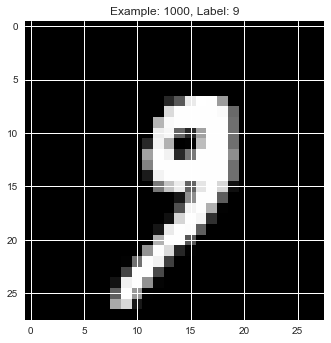

In [55]:
# set image id
image_id = 1000

# obtain image
mnist_eval_image = mnist_eval_data_images[image_id, :, :]
mnist_eval_label = mnist_eval_data_labels[image_id]

# set image plot title 
plt.title('Example: {}, Label: {}'.format(str(image_id), str(mnist_eval_label)))

# plot mnist handwritten digit sample
plt.imshow(mnist_eval_image, cmap='gray');

### 2.2. History of Oriented Gradients (HOG) Feature Extraction

The **"Histogram of Oriented Gradients (HOG)"** is a feature descriptor used in computer vision and image processing originally developed for the purpose of object detection. The technique counts occurrences of gradient orientation in localised portions of an image. Its usage became widespread in 2005 when Navneet Dalal and Bill Triggs, researchers for the French National Institute for Research in Computer Science and Automation (INRIA), presented their supplementary work on HOG descriptors at the Conference on Computer Vision and Pattern Recognition (CVPR) [9].

#### 2.2.1. Extraction of Image Patches

In the first step of the HOG feature extraction, the images are divided into tiny **"patches"**, each consisting of N×N pixels. In general, the patch size is a design choice informed by the scale of features we are looking for and task we aim to accomplish. To classify the 28x28 MNIST handwritten digit images presented above, we will use patches of size 7x7 pixels, which will nicely divide each image into 4x4=16 image patches. The extraction of such a single 7x7 image patch is shown below:  

<img align="center" style="max-width: 900px; height: auto" src="hogpatches.png">

#### 2.2.2. Calculation of Image Patch Gradients

Next, in order to determine the distinct values of the HOG features, we calculate the horizontal and vertical gradients of each image patch. This can be achieved by filtering each patch using the two kernels or **"filter masks"** as shown below. Thereby, we will obtain for each filter mask, a corresponding **"gradient map"** that records the intensity of pixel value change in the particular direction of the filter mask. As a result, the gradient maps remove a lot of non-discriminative information ( e.g., image regions that exhibit a constant colour intensity ), but highlighted regions of high color intensity changes.

<img align="center" style="max-width: 900px; height: auto" src="hoggradients.png">

Let's have look at the image gradients obtainable for the horizonal filter-mask or kernel $k_{x}=[-1, 0, 1]$ in the x-direction of the $1000^{th}$ sample image contained in the evaluation dataset. Thereby, dark pixel values correspond to high negative gradient value and light pixel values to high positive gradient values (prior to the determination of the gradients absolute value):

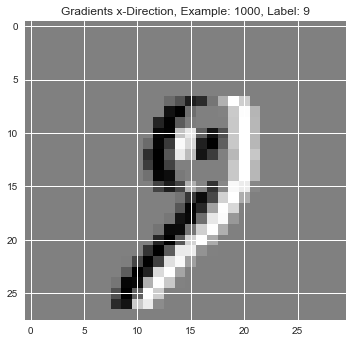

In [56]:
# define the filter masks
kernel_x = np.array([[-1, 0, 1]])

# determine the horizontal image gradients
g_x = sp.signal.convolve2d(mnist_eval_image, kernel_x) 

# set image plot title 
plt.title('Gradients x-Direction, Example: {}, Label: {}'.format(str(image_id), str(mnist_eval_label)))

# plot mnist handwritten digit sample
plt.imshow(g_x, cmap='gray');

Let's have look at the image gradients obtainable for the vertical filter-mask or kernel $k_{y}=[-1, 0, 1]^{T}$ in the y-direction of the $1000^{th}$ sample image contained in the evaluation dataset. Thereby, dark pixel values correspond to high negative gradient value and light pixel values to high positive gradient values (prior to the determination of the gradients absolute value):

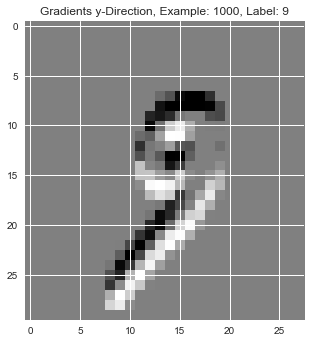

In [57]:
# define the filter masks
kernel_y = np.array([[-1, 0, 1]]).T

# determine the vertical image gradients
g_y = sp.signal.convolve2d(mnist_eval_image, kernel_y)

# set image plot title 
plt.title('Gradients y-Direction, Example: {}, Label: {}'.format(str(image_id), str(mnist_eval_label)))

# plot mnist handwritten digit sample
plt.imshow(g_y, cmap='gray');

#### 2.2.3. Calculation of Gradient Magnitude and Orientation

Once the gradients in (1) horizontal or x-direction and (2) vertical or y-direction is obtained for each pixel the information is consolidated to derive a more general information about the pixel intensity changes within an image. This is accomplished by the derivation of two important gradient attributes, namely:

>- the **"magnitude"** of the gradients given be the gradients L2-norm: $\sqrt{g_{x}^{2} + g_{y}^{2}}$,
>- the **"orientation"** of the gradients given by the gradients arctangent: $\arctan (\frac{g_{y}}{g_{y}})$.

We will derive both attributes for each of the pixel values contained in the distinct image patches. This results in the gradient magnitude and gradient orientation map, as shown below: 

<img align="center" style="max-width: 800px; height: auto" src="hogmagnitudeorientation.png">

#### 2.2.4. Calculation of Histogram of Oriented Gradients (HOG)

As a last step, we will determine the HOG descriptors based on the gradient magnitude and the gradient orientation map. To achieve this, we will compute the histogram of the gradient orientations binned into $b_{n}, n=1,...,9$ bins. Thereby, the distinct bins correspond to equidistant intervalls of possible gradient orientations, e.g. $b_{1}=[0°, 19°], b_{2}=[20°, 39°], b_{3}=[40°, 59°], ..., b_{9}=[160°, 179°].$

For each pixel of the image patch, the corresponding bin is selected based on its gradient orientation, and the vote ( the value that goes into the bin ) is selected based on the normalized gradient magnitude, according to: 

$$b_{d} = \frac{|b_{d} - d|}{b_{d}} \times m = \frac{|20 - 39|}{20} \times 297 = 282.15$$

$$b_{d+1} = \frac{|b_{d+1} - d|}{b_{d}} \times m = \frac{|40 - 39|}{20} \times 297 = 14.85$$

<img align="center" style="max-width: 800px; height: auto" src="hogfeatures.png">

Once all the values of the gradient maps have been collected to obtained histogram of gradients is normalized. This normalization is usually done by calculating the $L2-Norm$ over the distinct bin values, as shown in the following: 

$$||h||_{2} = \sqrt{b_{1}^{2} + b_{2}^{2} + ... + b_{n}^{2}} = \sqrt{420^2 + 1110^2 + ... + 787^2} = 2312.9$$

and normalize the distinct bins accordingly to obtain the HOG feature vector of a particular image patch:

$$ x_{i} = [\frac{420}{2312.9}, \frac{1110}{2312.9}, ..., \frac{787}{2312.9}] = [0.18, 0.47, 0.28, ..., 0.34]$$

where $i$ denotes the current of the N=16 image patches. Ultimately, all the HOG feature vectors obtained for the 16 distinct image patches are concatenated into a single HOG combined feature vector of an image.


Let's calculate the HOG feature descriptors for the MNIST images of the training dataset: 

In [58]:
# extract the hog features of all training images

# init list of hog features
mnist_train_data_hog_features = []
mnist_train_data_hog_images = []

# iterate over all training images
for i, mnist_train_image in enumerate(mnist_train_data_images):
    
    # extract hog features of current training image
    train_features, train_image = hog(mnist_train_image, orientations=4, pixels_per_cell=(7, 7), cells_per_block=(1, 1), visualize=True)
    
    # collect extracted hog features
    mnist_train_data_hog_features.append(train_features)
    mnist_train_data_hog_images.append(train_image)
    
    # case: print image processing status
    if i % 10000 == 0:
        
        # print log message
        print('[LOG] {} features of training image {} succesfully extracted.'.format(str(len(train_features)), str(i).zfill(5)))

[LOG] 64 features of training image 00000 succesfully extracted.
[LOG] 64 features of training image 10000 succesfully extracted.
[LOG] 64 features of training image 20000 succesfully extracted.
[LOG] 64 features of training image 30000 succesfully extracted.
[LOG] 64 features of training image 40000 succesfully extracted.
[LOG] 64 features of training image 50000 succesfully extracted.


Inspect the completeness of the generated feature vectors derived from the training data:

In [59]:
len(mnist_train_data_hog_features)

60000

Inspect a single feature vector:

In [60]:
mnist_train_data_hog_features[1000]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.70710678,
       0.70710678, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.70438964, 0.70438964, 0.08758127, 0.        , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.70710678, 0.        ,
       0.        , 0.70710678, 0.        , 0.        , 0.        ,
       0.        , 0.70710678, 0.        , 0.        , 0.70710678,
       0.90302573, 0.42958645, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.12755634, 0.        , 0.70133066,
       0.70133066, 0.63711679, 0.63711679, 0.43377919, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

Inspect the number of features extracted for each MNIST digit image: 

In [61]:
len(mnist_train_data_hog_features[1000])

64

Ok, we extracted HOG features for 4 orientations from each image consisting of 16 (4x4) patches of 7x7 pixels each. This results on total length of 64 extracted features per image (16 patches x 4 orientations).

Let's also visualise the HOG features of an exemplary MNIST digit image of the training dataset:

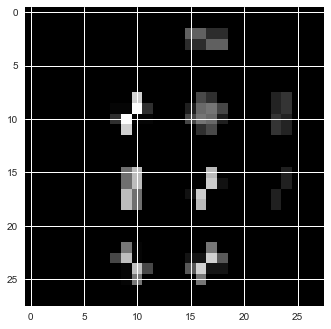

In [62]:
plt.imshow(mnist_train_data_hog_images[1000], cmap='gray')

Let's calculate the HOG feature descriptors for the MNIST images of the training dataset: 

In [63]:
# extract the hog features of all evaluation images

# init list of hog features
mnist_eval_data_hog_features = []
mnist_eval_data_hog_images = []

# iterate over all training images
for i, mnist_eval_image in enumerate(mnist_eval_data_images):
    
    # extract hog features of current evluation image
    eval_features, eval_image = hog(mnist_eval_image, orientations=4, pixels_per_cell=(7, 7), cells_per_block=(1, 1), visualize=True)
    
    # collect extracted hog features
    mnist_eval_data_hog_features.append(eval_features)
    mnist_eval_data_hog_images.append(eval_image)
    
    # case: print image processing status
    if i % 1000 == 0:
        
        # print log message
        print('[LOG] {} features of evaluation image {} succesfully extracted.'.format(str(len(eval_features)), str(i).zfill(5)))

[LOG] 64 features of evaluation image 00000 succesfully extracted.
[LOG] 64 features of evaluation image 01000 succesfully extracted.
[LOG] 64 features of evaluation image 02000 succesfully extracted.
[LOG] 64 features of evaluation image 03000 succesfully extracted.
[LOG] 64 features of evaluation image 04000 succesfully extracted.
[LOG] 64 features of evaluation image 05000 succesfully extracted.
[LOG] 64 features of evaluation image 06000 succesfully extracted.
[LOG] 64 features of evaluation image 07000 succesfully extracted.
[LOG] 64 features of evaluation image 08000 succesfully extracted.
[LOG] 64 features of evaluation image 09000 succesfully extracted.


Inspect the completeness of the generated feature vectors derived from the evaluation data:

In [64]:
len(mnist_eval_data_hog_features)

10000

Let's also visualise the HOG features of an exemplary MNIST digit image of the evaluation dataset:

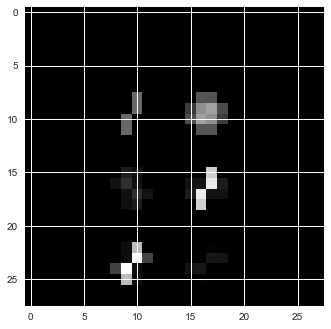

In [65]:
plt.imshow(mnist_eval_data_hog_images[1000], cmap='gray')

### 2.3. History of Oriented Gradients (HOG) Feature Classification

#### 2.3.1. Training of the Support Vector Machine Classifier

Let's instantiate one of the SVM classifiers available in `Scikit-Learn` to learn a linear seperating hyperplane based on the extracted History of Oriented Gradients (HOG) features:

In [66]:
# init the Support Vector Machine classifier
svm = SVC(kernel='linear', C=1, random_state=random_seed)

Train or fit the SVM classifier using the extracted training dataset HOG features and training dataset labels:

In [67]:
# Perform the training
svm.fit(mnist_train_data_hog_features[0:10000], mnist_train_data_labels[0:10000])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

#### 2.3.2. Evaluation of the trained Support Vector Machine Classifier

After fitting the HOG features of the training data, the optimal seperating hyperplane $H^{*}$ learned by the SVM model can then be used to predict the corresponding class labels $y_{i}'$ of so far unknown observations $x_{i}'$. We will now utilize the trained model to predict the class labels of the observations contained in the evaluation dataset based the extracted HOG features:

In [68]:
y_pred = svm.predict(mnist_eval_data_hog_features)

Let's have a look at the class labels $y_{i}'$ **predicted** by the SVM classifier on the evaluation dataset:

In [69]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

As well as the **true** class labels $y_{i}$ as contained in the evaluation dataset:

In [70]:
mnist_eval_data_labels

array([7, 2, 1, ..., 4, 5, 6])

Ok, comparing the **true** and **predicted** class labels looks encouraging. Let's determine the exact **prediction accuracy** that the optimal separating hyperplane $\mathcal{H}^{*}$ learned by the SVM was able to achieve on the evaluation dataset:

In [71]:
print('Model classification accuracy: {}%'.format(str(metrics.accuracy_score(mnist_eval_data_labels, y_pred) * 100)))

Model classification accuracy: 91.9%


Determine the number of **misclassified** data sampels in the evaluation dataset:

In [72]:
print('Number of mislabeled points out of a total {} points: {}'.format(mnist_eval_data_labels.shape[0], np.sum(mnist_eval_data_labels != y_pred)))

Number of mislabeled points out of a total 10000 points: 810


Determine and plot the **confusion matrix** of the individual predictions:

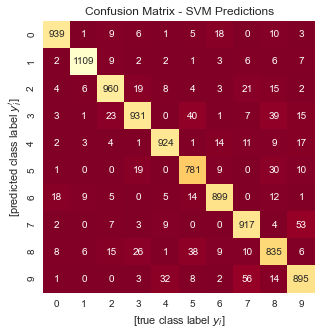

In [73]:
# determine the prediction confusion matrix
mat = confusion_matrix(mnist_eval_data_labels, y_pred)

# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=range(0,10), yticklabels=range(0,10))

# add plot axis labels
plt.xlabel('[true class label $y_{i}$]')
plt.ylabel('[predicted class label $y_{i}\'$]')

# add plot title
plt.title('Confusion Matrix - SVM Predictions');

### Exercises:

We recommend you to try the following exercises as part of the lab:

**1. Train and evaluate the prediction accuracy of SVM models trained with different hyperparameters.**

> Change the kernel function $\phi$ of the SVM to a polynomial kernel, fit your model and calculate the new classification accuracy on the IRIS dataset. Subsequently, repeat similar experiment with different SVM hyperparameter setups by changing the value of $C$, $\gamma$ and the kernel function $\phi$. What pattern can be observed by the distinct hyperparameter setups in terms of classification accuracy? 

In [74]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

**2. Train and evaluate the prediction accuracy of SVM models using different or additional features.**

> Fix the hyperparameters of the SVM and evalute the classification accuracy on the MNIST dataset using different features. For example, evaluate the prediction accuracy that can be derived based on a set of Scale-Invariant Feature Transform (SIFT) features. Or the combination of HOG and SIFT features. Will the consideration of additional features improve you classification accuracy?

In [75]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

### References:

[1] **"A Tutorial on Support Vector Machines for Pattern Recognition"**, Burges C. J. C. , Bell Laboratories, Lucent Technologies, Data Mining and Knowledge Discovery, 2, 121-167, 1998.

[2] **"Support Vector Networks"**, Cortes C. and Vapnik V., Machine Learning, 20:273-297, 1995. 

[3] **"Comparison of View-Based Object Recognition Algorithms Using Realistic 3D Models"**, Blanz V., Schölkopf B., Bülthoff H., Burges C., Vapnik V., and Vetter T., Artificial Neural Networks - ICANN'96, 251-256, 1996. 

[4] **"Identifying Speaker with Support Vector Networks"**, Schmidt M., Interface '96 Proceedings, 1996. 

[5] **"Training Support Vector Machines: An Application to Face Detection"**, Osuna E., Freund R., Girosi F., IEEE Conference on Computer Vision and Pattern Recognition, 130-136, 1997.

[6] **"Text Categorization With Support Vector Machines"**, Joachims T., Technical Report, LS VIII Number 23, University of Dortmund, 1997.

[7] **"A Training Algorithm for Optimal Margin Classifiers"**, Boser, B. E., Guyon, I. M., Vapnik V. A., Fifth Annual Workshop on Computational Learning Theory, 1992.  

[8] **"Theoretical Foundations of the Potential Function Method in Pattern Recognition Learning"**, Aizermann M. A., Bravermann E. M., Rozoner, L. I., Automation and Remote Control, 25:821-837, 1964.

[9] **"Histograms of Oriented Gradients for Human Detection"**, Dalal N. and Triggs B., IEEE computer society conference on computer vision and pattern recognition (CVPR'05), vol. 1, pp. 886-893. IEEE, 2005.

### Lab Summary:

In this lab, a step by step introduction into (1) **Support Vector Classification** and (2) **Histogram of Oriented Gradients (HOG) features** classification is presented. The code and exercises presented in this lab may serves as a starting point for more complex and tailored programs.

You may want to execute the content of your lab outside of the Jupyter notebook environment, e.g. on a compute node or a server. The cell below converts the lab notebook into a standalone and executable python script. Pls. note that to convert the notebook, you need to install Python's **nbconvert** library and its extensions:

In [76]:
# installing the nbconvert library
!pip install nbconvert
!pip install jupyter_contrib_nbextensions

/bin/sh: pip: command not found
/bin/sh: pip: command not found


Let's now convert the Jupyter notebook into a plain Python script:

In [77]:
!jupyter nbconvert --to script cfds_lab_06.ipynb

[NbConvertApp] Converting notebook cfds_lab_06.ipynb to script
[NbConvertApp] Writing 54890 bytes to cfds_lab_06.py
